In [1]:
import os
import datetime as dt
from collections import OrderedDict
import csv
from pathlib import Path
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30.0, 8.0] # Default: [6.0, 4.0]

In [2]:
df = pd.read_csv('data/csv/oving5/0141126194/Partner.csv', index_col=0, parse_dates=True)

In [3]:
df

,SourceEdit1,SizeMeasure1,SourceEdit_ErrorCount1,WarningCount1,JunitTest1,SuccessCount1,FailureCount1,JunitTest_ErrorCount1,Completion1
2017-02-19 22:50:21,1.0,21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:51:52,1.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:52:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,0.00
2017-02-19 22:53:53,1.0,25.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:54:30,1.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:54:33,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,0.00
2017-02-19 22:55:03,1.0,24.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:55:04,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,0.00
2017-02-19 22:55:17,1.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-19 22:55:18,NaN,NaN,NaN,NaN,1.0,1.0,0.0,3.0,0.25


## Creating relative time column

In [4]:
def create_relative_time_column(df):

    df['Relative_time'] = dt.timedelta(seconds=0)  # Setting all the rows to 0, but only the first row will remain 0

    for i in range(1, len(df)):
        diff = df.index[i] - df.index[i-1]
        if diff.seconds > 600:
            diff = dt.timedelta(seconds=600)
        accumulated = df.Relative_time.iloc[i-1] + diff
        df.Relative_time.iat[i] = accumulated
    
    #df['Relative_time_seconds'] = df.Relative_time.apply(lambda x: x.seconds)
    
    df['Active_time'] = df.index[0] + df.Relative_time
    
    return df

In [5]:
df = create_relative_time_column(df)

In [6]:
df.filter(regex='_time')[40:]

,Relative_time,Active_time
2017-02-19 23:07:21,00:17:00,2017-02-19 23:07:21
2017-02-20 08:20:29,00:27:00,2017-02-19 23:17:21
2017-02-20 08:21:00,00:27:31,2017-02-19 23:17:52
2017-02-20 08:21:01,00:27:32,2017-02-19 23:17:53
2017-02-20 08:23:40,00:30:11,2017-02-19 23:20:32
2017-02-20 08:24:45,00:31:16,2017-02-19 23:21:37
2017-02-20 08:24:55,00:31:26,2017-02-19 23:21:47
2017-02-20 08:27:34,00:34:05,2017-02-19 23:24:26
2017-02-20 08:29:15,00:35:46,2017-02-19 23:26:07
2017-02-20 08:30:10,00:36:41,2017-02-19 23:27:02


## Forward-filling and aggregating data

In [7]:
def forward_fill_columns(df):
    df.update(df.filter(regex='^SizeMeasure\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SizeMeasure'
    df.update(df.filter(regex='^WarningCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'WarningCount'
    df.update(df.filter(regex='^Completion\d{1,}$').ffill())  # Forward-filling all columns beginning with 'Completion'
    df.update(df.filter(regex='^SuccessCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SuccessCount'
    df.update(df.filter(regex='^FailureCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'FailureCount'
    df.update(df.filter(regex='^JunitTest_ErrorCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'JunitTest_ErrorCount'
    df.update(df.filter(regex='^SourceEdit_ErrorCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'JunitTest_ErrorCount'
    return df

In [8]:
def aggregate_columns(df):
    df['TotalSizeMeasure'] = df.filter(regex='^SizeMeasure\d{1,}$').sum(axis=1)
    # We get the total completion by averaging all the Completion columns. Not skipping NaNs so we always require all values
    df['TotalCompletion'] = df.filter(regex='^Completion\d{1,}$').mean(skipna=False, axis=1)
    # Setting SourceEdit and JunitTest to 1 where any of the SourceEdit# or JunitTest# columns are 1
    df['SourceEdit'] = np.nan
    df.SourceEdit.iloc[np.where(df.filter(regex='^SourceEdit\d{1,}$') == 1)[0]] = 1
    df['JunitTest'] = np.nan
    df.JunitTest.iloc[np.where(df.filter(regex='^JunitTest\d{1,}$') == 1)[0]] = 1
    df['Launch'] = np.nan
    df.Launch.iloc[np.where(df.filter(regex='^Launch\d{1,}$') == 1)[0]] = 1
    return df

In [9]:
df = forward_fill_columns(df)
df = aggregate_columns(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Plotting

In [10]:
df.filter(regex='JunitTest')

,JunitTest1,JunitTest_ErrorCount1,JunitTest
2017-02-19 22:50:21,NaN,NaN,NaN
2017-02-19 22:51:52,NaN,NaN,NaN
2017-02-19 22:52:00,1.0,4.0,1.0
2017-02-19 22:53:53,NaN,4.0,NaN
2017-02-19 22:54:30,NaN,4.0,NaN
2017-02-19 22:54:33,1.0,4.0,1.0
2017-02-19 22:55:03,NaN,4.0,NaN
2017-02-19 22:55:04,1.0,4.0,1.0
2017-02-19 22:55:17,NaN,4.0,NaN
2017-02-19 22:55:18,1.0,3.0,1.0


In [11]:
df['SourceEdit_num'] = df.SourceEdit1.cumsum().ffill()

In [12]:
df_plot = df.drop(['Relative_time', 'Active_time'], axis=1).filter(['SizeMeasure1', 'SourceEdit_ErrorCount1', 'WarningCount1',
                                                                   'SourceEdit_num'])
df_plot.index = df.Active_time

In [13]:
scaler = MinMaxScaler().fit(df_plot)
df_norm = scaler.transform(df_plot)

In [14]:
df_norm = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())
#df_norm = (df_plot - df_plot.mean()) / df_plot.std()

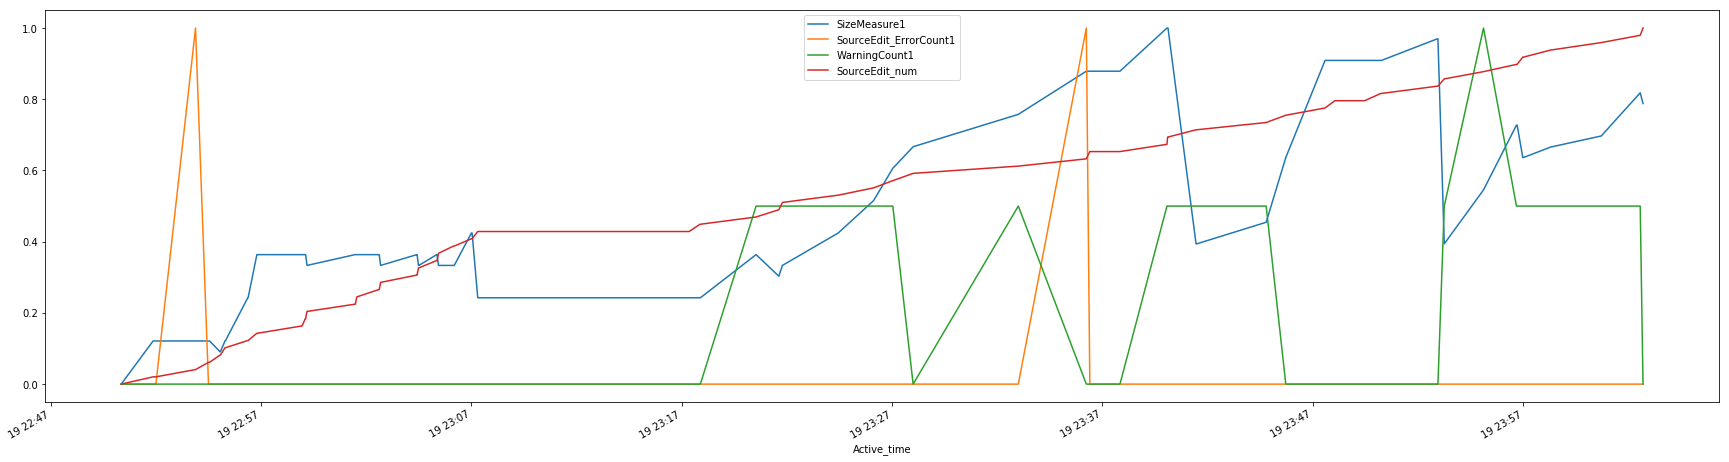

In [15]:
df_norm.plot()
#plt.plot(df_norm)

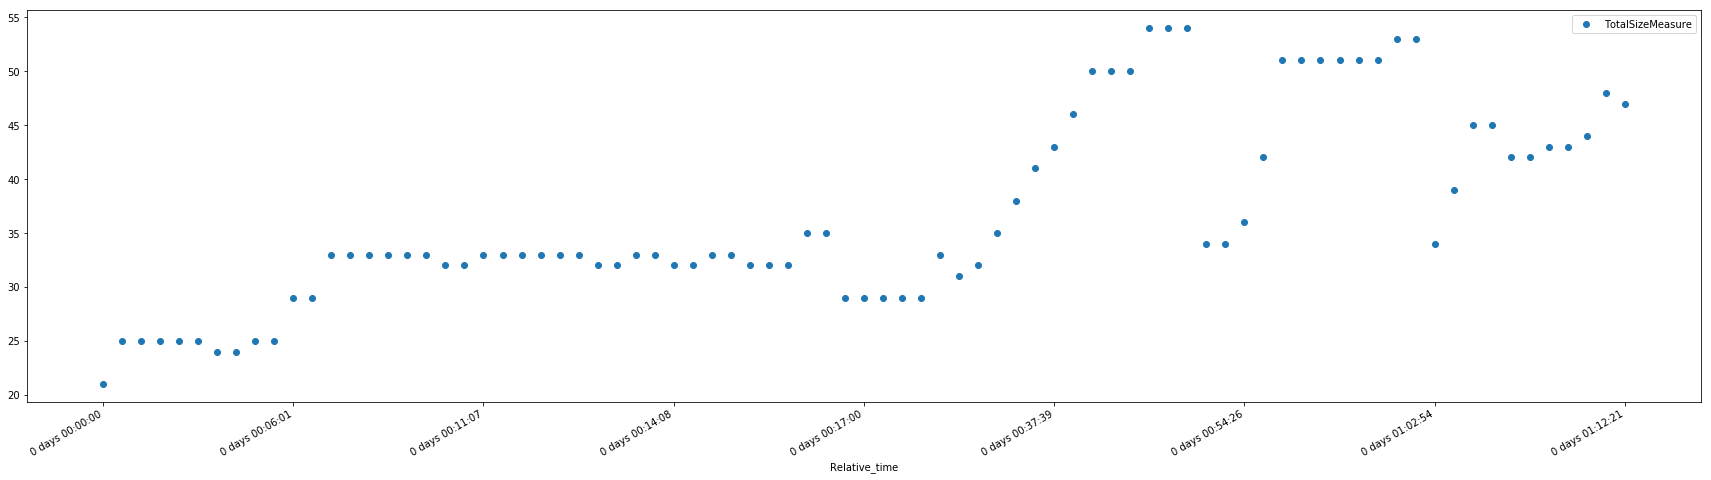

In [16]:
df.plot(x='Relative_time', y='TotalSizeMeasure', style='o')

In [17]:
scaler = MinMaxScaler().fit(df.drop('Relative_time', axis=1).fillna(0))
scaler.transform(df.drop('Relative_time', axis=1).fillna(0))

TypeError: float() argument must be a string or a number, not 'Timestamp'

## Importing the grades into a dictionary where the keys are username hashes

In [17]:
grades = OrderedDict()
with open('data/brukernummer-karakter.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['hash', 'grade'])
    for row in reader:
        grades[row['hash']] = row['grade']

In [18]:
grades

OrderedDict([('1961606504', 'D'),
             ('0003195112', 'A'),
             ('2370221083', 'A'),
             ('3417169296', 'C'),
             ('3049944332', 'F'),
             ('3169265502', 'B'),
             ('1309367009', 'A'),
             ('2900473238', 'F'),
             ('0100313338', 'F'),
             ('3528648608', 'F'),
             ('3635712884', 'F'),
             ('3172735784', 'A'),
             ('3092715252', 'C'),
             ('2885425503', 'F'),
             ('0053596332', 'A'),
             ('3401034429', 'C'),
             ('3311094284', 'B'),
             ('1395134805', 'E'),
             ('0244999521', 'C'),
             ('4025554098', 'F'),
             ('1625178573', 'F'),
             ('3447007398', 'F'),
             ('2747401993', 'A'),
             ('2877527733', 'C'),
             ('1843717383', 'F'),
             ('0109441257', 'F'),
             ('3810295105', 'C'),
             ('3565377643', 'C'),
             ('0312660958', 'C'),
             (

## Creating features from the raw data

In [19]:
def get_features(df, hash_id):
    df = create_relative_time_column(df)
    df = forward_fill_columns(df)
    df = aggregate_columns(df)
    #if 'TotalSizeMeasure' not in df.columns:
    #    return None
    f_df = pd.DataFrame(index=[hash_id])
    f_df['MaxSizeMeasure'] = df.TotalSizeMeasure.max()
    f_df['FinalSizeMeasure'] = df.TotalSizeMeasure.iloc[-1]  # Works because SizeMeasure is forward-filled!
    f_df['JunitRuns'] = df.filter(regex='^JunitTest\d{1,}$').sum().sum()
    if f_df.JunitRuns.item() == 0:
        print('{} not valid'.format(hash_id))
        return None
    #if df.Completion.last_valid_index() is None:
        #return None
    #f_df['FinalCompletion'] = df.loc[df.Completion.last_valid_index()].Completion
    f_df['SizeMeasure_times_JunitRuns'] = (f_df.FinalSizeMeasure * f_df.JunitRuns)[-1]
    f_df['SizeMeasure_times_Completion_avg'] = (df.TotalSizeMeasure * df.TotalCompletion).mean()
    f_df['MinutesSpent'] = df.Relative_time.iloc[-1].seconds / 60
    if f_df.MinutesSpent.item() < 5:
        print('Student {} spent less than 5 minutes, discarded'.format(hash_id))
        return None
    if hash_id not in grades:
        print('No grade found for {}'.format(hash_id))
        return None
    f_df['Grade'] = grades[hash_id]
    return f_df

In [20]:
features_df = get_features(df, '0141126194')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
features_df

,MaxSizeMeasure,FinalSizeMeasure,JunitRuns,SizeMeasure_times_JunitRuns,SizeMeasure_times_Completion_avg,MinutesSpent,Grade
0141126194,54.0,47.0,31.0,1457.0,7.360759,72.35,A


## Loading all csv files for a given part of an exercise:

In [22]:
df_partner = pd.DataFrame() 
directory_in_str = 'data/csv/oving5'
pathlist = Path(directory_in_str).glob('**/Partner.csv')
for path in pathlist:
    path = str(path)
    user_df = pd.read_csv(path, index_col=0, parse_dates=True)
    feature_df = get_features(user_df, path.split(os.sep)[-2])
    df_partner = df_partner.append(feature_df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Student 0000100519 spent less than 5 minutes, discarded
Student 0095957624 spent less than 5 minutes, discarded
No grade found for 0255406642
Student 0381900994 spent less than 5 minutes, discarded
Student 0911527863 spent less than 5 minutes, discarded
Student 1498100588 spent less than 5 minutes, discarded
No grade found for 1945937763
Student 2127261703 spent less than 5 minutes, discarded
Student 2511031326 spent less than 5 minutes, discarded
Student 2839268466 spent less than 5 minutes, discarded
Student 3008884435 spent less than 5 minutes, discarded
Student 3057131206 spent less than 5 minutes, discarded
Student 3142703072 spent less than 5 minutes, discarded
Student 3250159375 spent less than 5 minutes, discarded
Student 3635706237 spent less than 5 minutes, discarded
Student 3639253708 spent less than 5 minutes, discarded
No grade found for 3685854592


In [23]:
df_partner

,MaxSizeMeasure,FinalSizeMeasure,JunitRuns,SizeMeasure_times_JunitRuns,SizeMeasure_times_Completion_avg,MinutesSpent,Grade
0003049546,86.0,86.0,10.0,860.0,45.565217,75.300000,E
0003195112,50.0,49.0,4.0,196.0,41.700000,41.566667,A
0003300860,61.0,61.0,15.0,915.0,9.115741,130.816667,C
0003571001,57.0,50.0,5.0,250.0,35.711538,102.916667,C
0016856660,63.0,61.0,6.0,366.0,36.427419,176.366667,C
0053596332,91.0,69.0,24.0,1656.0,10.076923,140.100000,A
0058832438,100.0,57.0,16.0,912.0,57.462121,100.500000,E
0067961009,54.0,53.0,10.0,530.0,27.024752,141.866667,E
0093113848,29.0,29.0,12.0,348.0,15.000000,49.983333,A
0096922702,32.0,32.0,1.0,32.0,32.000000,10.200000,B


In [24]:
grade_dict = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'F': 0,
}

In [ ]:
df_partner.Grade = df_partner.Grade.apply(lambda x: grade_dict[x])

In [25]:
# Extracting the Grade column and then removing it from the DataFrame
y_column = df_partner[['Grade']].copy().squeeze()
df_partner.drop(['Grade'], axis=1, inplace=True)

In [26]:
training_input, testing_input, training_output, testing_output = train_test_split(df_partner, y_column, test_size=0.33)

In [ ]:
input_scaler = MinMaxScaler()
training_input_scaled = input_scaler.fit(training_input).transform(training_input)
validation_input_scaled = input_scaler.fit(testing_input).transform(validation_input)

output_scaler = MinMaxScaler()

## Training classifier

In [27]:
classifier = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.1, max_depth=5, verbose=1)
classifier.fit(training_input, training_output)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Predicting using the classifier

In [ ]:
prediction_output = classifier.predict(testing_input)
prediction_output

In [ ]:
testing_output

In [ ]:
plt.scatter(df_partner.MaxSizeMeasure, df_partner.SizeMeasure_div_JunitRuns)

## Clustering

In [ ]:
training_input.MinutesSpent.values.reshape(-1, 1)

In [ ]:
kmeans_clustering = KMeans(n_clusters=6, verbose=True).fit(training_input.MinutesSpent.values.reshape(-1, 1))

In [ ]:
prediction_output = kmeans_clustering.labels_

In [ ]:
kmeans_clustering.cluster_centers_

In [ ]:
compare = pd.DataFrame(index=training_output.index)
compare['testing_output'] = training_output
compare['prediction_output'] = prediction_output
compare